* MODELS

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


In [2]:
df = pd.read_csv('data/data_numeric.csv')

In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [11]:
feature_X = ['area', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnishingstatus']

feature_y = ['price']

In [12]:
len(df)

545

In [16]:
### Cross validation
X = df[feature_X]
y = df[feature_y]

cv = 5

In [18]:
linear_model

LinearRegression()

In [22]:
linear_model = LinearRegression()
score_lm = cross_val_score(linear_model, X, y)
mean_lm = np.mean(score_lm)
print(f'Linear Regression: {mean_lm}')

Linear Regression: -9.910676773077242


In [31]:
linear_model.fit(X.iloc[:400],y.iloc[:400])
linear_model.score(X.iloc[400:],y.iloc[400:])

-4.320500188719637

In [35]:
from sklearn.linear_model import Ridge
linear_model = Ridge()
linear_model.fit(X.iloc[:400],y.iloc[:400])
linear_model.score(X.iloc[400:],y.iloc[400:])


-4.360629272247082

In [28]:
(linear_model.predict(X) - y)

,price
0,-5.098135e+06
1,-1.611620e+06
2,-4.707372e+06
3,-3.806301e+06
4,-4.638513e+06
...,...
540,1.606039e+06
541,5.046082e+05
542,9.097632e+05
543,8.593385e+05


In [29]:
score_lm

array([ -1.94277003,  -5.00707214, -16.22431367, -21.10749485,
        -5.27173317])

In [57]:
linear_model = LinearRegression()

mse_scores_ml = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error')

lm = np.mean(-mse_scores_ml)

print(f'MSE promedio (Regresión Lineal): {lm}')

print(f'Porcentage error: {lm*100/y.mean()}')

MSE promedio (Regresión Lineal): 1284724.1363186175
Porcentage error: price    26.951901
dtype: float64


In [59]:
svr_model = SVR(kernel='linear')

mse_scores_svr = cross_val_score(svr_model, X, y, scoring='neg_root_mean_squared_error')

svr = np.mean(-mse_scores_svr)

print(f'MSE promedio (SVR Regression): {svr}')
print(f'Porcentage error: {svr*100/y.mean()}')

MSE promedio (SVR Regression): 1702298.4774188679
Porcentage error: price    35.712087
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [60]:
clf_model = RandomForestRegressor()

mse_scores_clf = cross_val_score(clf_model, X, y, scoring='neg_root_mean_squared_error')

clf = np.mean(-mse_scores_clf)

print(f'MSE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-pack

MSE promedio (Ramdom Forest Regressor): 1491090.6660477226
Porcentage error: price    31.281212
dtype: float64


In [68]:
clf_model = RandomForestRegressor()
clf_model.fit(X,y)
pd.DataFrame({'columns' : X.columns, 'importance' : clf_model.feature_importances_}).sort_values('importance')

/tmp/ipykernel_333082/2246509998.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_model.fit(X,y)


,columns,importance
4,mainroad,0.009069
7,hotwaterheating,0.015932
5,guestroom,0.021098
6,basement,0.029569
10,prefarea,0.034670
1,bedrooms,0.041144
3,stories,0.051239
11,furnishingstatus,0.053580
8,airconditioning,0.057014
9,parking,0.060411


In [61]:

lgb_model = LGBMRegressor()

mse_scores_lgb = cross_val_score(lgb_model, X, y, scoring='neg_root_mean_squared_error')

lgb = np.mean(-mse_scores_lgb)

print(f'MSE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 11
[LightGBM] [Info] Start training from score 4028315.366972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

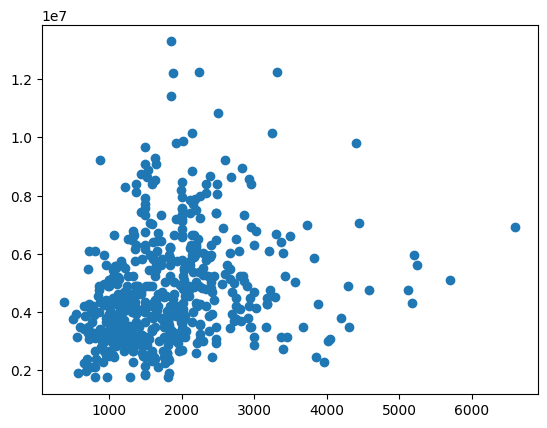

In [65]:
plt.scatter(X['area']/(X['bathrooms']+X['bedrooms']), y)